In [2]:
import numpy
import matplotlib.pyplot as plt
from scipy import optimize, integrate
import pandas
import sys
sys.path.insert(0,'/home/leo/Documents/cosmic_ray_generator/api')
import functions

A function that scales the theoretical model to match the best fit line at low energies

In [3]:
def scaledTheory(t,E):
    scale=functions.composite(E_mu=E)/functions.theory_supressed(E_mu=E,theta=0)
    return scale*functions.theory_supressed(theta=t,E_mu=E)

In [4]:
integrate.quad(scaledTheory, a=0, b=numpy.pi/2, args=(1,))

(14.250438717284393, 2.658225867743725e-08)

A function to integrate the scaled theoretical model over all angles to obtain an overall energy distribution

In [6]:
def integrated_theory(E_mu):
    return integrate.quad(scaledTheory, a=0, b=numpy.pi/2,args=(E_mu,))[0]
f=numpy.vectorize(integrated_theory)

Generates a plot of the energy distribution of vertical muons compared to the curve integrated over all angles

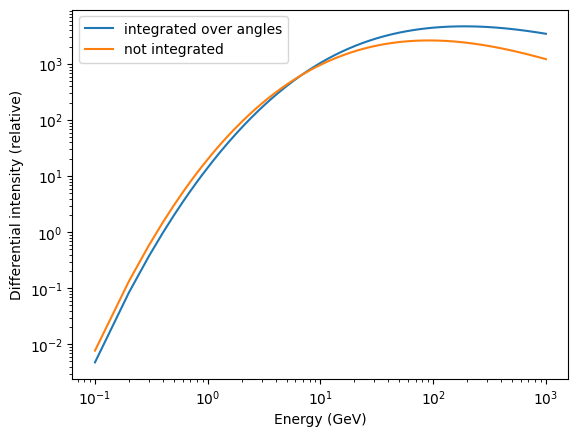

In [8]:
x=numpy.linspace(0.1,1000,10000)
# y=[]
# for i in x:
#     temp=integrate.quad(scaledTheory, a=0, b=numpy.pi/2,args=(i,))
#     y.append(temp[0])
plt.plot(x,f(x)*x**3, label='integrated over angles')
plt.plot(x, [functions.composite(E_mu=x[i])*x[i]**3 for i in range(len(x))], label='not integrated')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Differential intensity (relative)')
plt.xlabel('Energy (GeV)')
plt.legend()

A series of functions to perform a polynomial fit on the integrated curve

In [9]:
def poly(x,fit):
    tot=0
    for i in range(4):
        tot+=fit[i]*x**i
    return tot

In [13]:
x=numpy.linspace(0.1,18000,100000)
# y_theo=[functions.integrated_theory(x[i]) for i in range((len(x)))]
y_bf=[functions.integrated_fast(x[i]) for i in range((len(x)))]

Generates a plot to compare between the fitted curve and the original curve

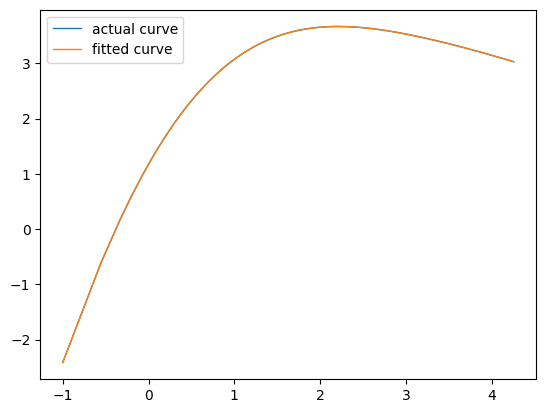

In [14]:
plt.plot(numpy.log10(x), g(numpy.log10(x)), label='actual curve', linewidth=1)
plt.plot(numpy.log10(x), numpy.log10(y_bf*x**3), label='fitted curve', linewidth=1)
# plt.xscale('log')
# plt.yscale('log')
plt.legend()

In [11]:
f=numpy.vectorize(lambda x: functions.integrated_theory(x))
x=numpy.linspace(0.1,1000000,1000000)
y=f(x)
fit=numpy.polyfit(numpy.log10(x),numpy.log10(y*x**3),deg=6,full=True)

In [12]:
g=numpy.poly1d(fit[0])

In [11]:
fit #order 6

(array([ 4.05232241e-04, -7.30338740e-03,  4.05996475e-02,  1.06852527e-03,
        -8.53022670e-01,  2.82746788e+00,  7.69578851e-01]),
 array([3.00915022]),
 7,
 array([2.62975028e+00, 2.88718327e-01, 3.22345934e-02, 3.97061561e-03,
        5.79243684e-04, 1.06426441e-04, 1.35247238e-05]),
 2.220446049250313e-10)